In [265]:
from Metaheuristicas.fitness_functions import *


In [266]:
X, y = load_and_preprocess_data(filename='Resources/SeisBenchV1_v1_1.json')


In [267]:
from Metaheuristicas.Genetico import genetic_algorithm

mutation = 0.1
crossover = 0.9

In [268]:
import pandas as pd
from IPython.display import display, clear_output

# Step 1: Initialize empty DataFrames for each classifier with metrics as columns
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

naive_bayes_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
random_forest_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
neural_network_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])

# Display all tables function
def display_tables():
    clear_output(wait=True)
    print("Naive Bayes Results")
    display(naive_bayes_df)
    print("Random Forest Results")
    display(random_forest_df)
    print("Neural Network Results")
    display(neural_network_df)

In [269]:
def add_result(classifier, fitness_function, accuracy, precision, recall, f1_score, auc):
    new_data = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score,
        "AUC": auc
    }

    if classifier == "Naive Bayes":
        global naive_bayes_df
        naive_bayes_df.loc[fitness_function] = new_data
    elif classifier == "Random Forest":
        global random_forest_df
        random_forest_df.loc[fitness_function] = new_data
    elif classifier == "Neural Network":
        global neural_network_df
        neural_network_df.loc[fitness_function] = new_data

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def confusion_matrix_heatmap(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels', fontsize=14, fontname='Verdana')
    plt.ylabel('True Labels', fontsize=14, fontname='Verdana')
    plt.xticks(fontsize=14, fontname='Verdana')
    plt.yticks(fontsize=14, fontname='Verdana')
    plt.savefig('confusion_matrix.png', dpi=600, bbox_inches='tight')
    plt.show()

# Split

In [271]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

#dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Models

In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
DT = RandomForestClassifier()

# Feature Selection

In [273]:
def seleccionar_caracteristicas(df, indices, one_based=False):
    if one_based:
        indices = [i - 1 for i in indices]
    prefijos = [f"f{n}_" for n in indices]
    columnas_seleccionadas = [col for col in df.columns if any(col.startswith(prefijo) for prefijo in prefijos)]
    return df[columnas_seleccionadas]


In [274]:
# def seleccionar_caracteristicas(df, indices):
#     return [col for col in df.columns if any(col.startswith(f"f{n}_") for n in indices)]


## GA

In [275]:
GaMiFtIndices = [2, 3, 5, 6, 7, 9, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25,
                  27, 30, 32, 34, 36, 37,38, 40, 42, 43, 44, 46, 48, 50, 51, 52, 55,
                    58, 60, 61, 62, 63, 64, 65, 67, 68, 71, 72, 73, 74, 76, 78, 79, 80, 81, 82, 83
]
GaX2FtIndices = [9, 11, 12, 13, 16, 19, 21, 23, 28, 30, 34,38, 39, 40, 48, 55, 58, 59, 60, 61, 65, 66,70, 71, 72, 74, 75, 76, 77, 84]
GaReliefFFtIndices = [2, 4, 9, 11, 14, 16, 17, 19, 21, 23, 25, 27,38, 39, 42, 49, 55, 58, 62, 64, 65, 66, 67,69, 71, 72, 76, 78, 81]

In [276]:
X_train_GaMiFt = seleccionar_caracteristicas(X_train, GaMiFtIndices, one_based=False)
X_test_GaMiFt = seleccionar_caracteristicas(X_test, GaMiFtIndices, one_based=False)
X_train_GaX2Ft = seleccionar_caracteristicas(X_train, GaX2FtIndices, one_based=False)
X_test_GaX2Ft = seleccionar_caracteristicas(X_test, GaX2FtIndices, one_based=False)
X_train_GaReliefFFt = seleccionar_caracteristicas(X_train, GaReliefFFtIndices, one_based=False)
X_test_GaReliefFFt = seleccionar_caracteristicas(X_test, GaReliefFFtIndices, one_based=False)


In [277]:
X_train_GaX2Ft.columns


Index(['f9_t_peak2peak', 'f11_t_energy', 'f12_t_zcr',
       'f13_t_PeaksAboveRMSDensity_fun', 'f16_f_entropy', 'f19_f_var',
       'f21_f_kurtosis', 'f23_f_peak_1020_value', 'f28_f_peak2rms',
       'f30_f_PeaksAboveRMSDensity_fun', 'f34_f_peaks_pos_3',
       'f38_w_f_maxval_D3', 'f39_w_f_maxval_D4', 'f40_w_f_maxval_D5',
       'f48_w_f_mean_A6', 'f55_w_t_meanEnergyAD', 'f58_w_t_PEC_D2',
       'f59_w_t_PEC_D3', 'f60_w_t_PEC_D4', 'f61_w_t_PEC_D5', 'f65_w_t_rms_D2',
       'f66_w_t_rms_D3', 'f70_w_t_peak2peak_A6', 'f71_w_t_peak2peak_D1',
       'f72_w_t_peak2peak_D2', 'f74_w_t_peak2peak_D4', 'f75_w_t_peak2peak_D5',
       'f76_w_t_peak2peak_D6', 'f77_w_t_peak2rms_A6',
       'f84_w_t_meanEnergyCoeff'],
      dtype='object')

In [278]:
X_test_GaX2Ft.columns


Index(['f9_t_peak2peak', 'f11_t_energy', 'f12_t_zcr',
       'f13_t_PeaksAboveRMSDensity_fun', 'f16_f_entropy', 'f19_f_var',
       'f21_f_kurtosis', 'f23_f_peak_1020_value', 'f28_f_peak2rms',
       'f30_f_PeaksAboveRMSDensity_fun', 'f34_f_peaks_pos_3',
       'f38_w_f_maxval_D3', 'f39_w_f_maxval_D4', 'f40_w_f_maxval_D5',
       'f48_w_f_mean_A6', 'f55_w_t_meanEnergyAD', 'f58_w_t_PEC_D2',
       'f59_w_t_PEC_D3', 'f60_w_t_PEC_D4', 'f61_w_t_PEC_D5', 'f65_w_t_rms_D2',
       'f66_w_t_rms_D3', 'f70_w_t_peak2peak_A6', 'f71_w_t_peak2peak_D1',
       'f72_w_t_peak2peak_D2', 'f74_w_t_peak2peak_D4', 'f75_w_t_peak2peak_D5',
       'f76_w_t_peak2peak_D6', 'f77_w_t_peak2rms_A6',
       'f84_w_t_meanEnergyCoeff'],
      dtype='object')

In [279]:
X_train_GaMiFt

,f2_t_std,f3_t_var,f5_t_kurtosis,f6_t_multiscaleEntropy,f7_t_time2peak,f9_t_peak2peak,f11_t_energy,f12_t_zcr,f14_f_peaks_pos_1,f15_f_90_percent_energy,...,f72_w_t_peak2peak_D2,f73_w_t_peak2peak_D3,f74_w_t_peak2peak_D4,f76_w_t_peak2peak_D6,f78_w_t_peak2rms_D1,f79_w_t_peak2rms_D2,f80_w_t_peak2rms_D3,f81_w_t_peak2rms_D4,f82_w_t_peak2rms_D5,f83_w_t_peak2rms_D6
981,0.221336,0.118060,0.324572,0.309816,0.057497,0.893347,0.019644,0.205693,0.294118,0.165468,...,0.176292,0.771130,0.397751,0.000000,0.270919,0.357796,0.295884,0.517090,0.293814,0.126711
682,0.166333,0.083239,0.385767,0.454864,0.033947,0.580202,0.021582,0.123477,0.308824,0.119904,...,0.094440,0.551995,0.332916,0.616243,0.183968,0.417109,0.533950,0.374042,0.610554,0.653621
72,0.298387,0.172936,0.128106,0.876421,0.112865,0.673467,0.047794,0.208234,0.098039,0.105516,...,0.074492,0.078685,0.516118,0.095389,0.303767,0.050103,0.086714,0.249501,0.288402,0.358589
667,0.277159,0.157107,0.218519,0.436420,0.027934,0.467656,0.018958,0.159725,0.147059,0.122302,...,0.068841,0.507831,0.517549,0.195427,0.143388,0.154296,0.296296,0.266964,0.700875,0.464499
760,0.328323,0.196176,0.122968,0.797671,0.047977,0.370008,0.027768,0.140881,0.117647,0.146283,...,0.233625,0.528416,0.423184,0.302849,0.403345,0.302923,0.224390,0.170190,0.110726,0.458563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.148670,0.072827,0.332029,0.546363,0.040962,0.516619,0.011950,0.156154,0.171569,0.122302,...,0.096663,0.473235,0.402917,0.048717,0.466599,0.263705,0.259252,0.363444,0.278030,0.275334
1095,0.278180,0.157856,0.274789,0.372702,0.062257,0.893527,0.026414,0.098040,0.127451,0.119904,...,0.202115,0.353511,0.633628,0.167295,0.394722,0.513464,0.235925,0.366259,0.605150,0.478890
1130,0.313854,0.184809,0.155889,0.697177,0.036703,0.823164,0.017824,0.176575,0.245098,0.151079,...,0.127181,0.717329,0.512404,0.218940,0.157206,0.175252,0.316639,0.348381,0.224806,0.413088
860,0.191910,0.098980,0.363640,0.480545,0.031191,0.739834,0.012057,0.172390,0.313725,0.136691,...,0.061920,0.659099,0.377235,0.023621,0.293319,0.174452,0.526439,0.297950,0.601040,0.339054


## CS

In [280]:
CsMiFtIndices = [3, 5, 6, 10, 11, 12, 13, 14, 15, 17, 18, 21,23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35,
                 36, 37, 38, 39, 40, 41, 44, 45, 46, 49, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,84
]
CsX2FtIndices = [1, 7, 10, 19, 20, 24, 26, 27, 30, 32, 34, 37,38, 42, 58, 60, 61, 64, 65, 67, 68, 69, 72, 77]
CsReliefFFtIndices = [4, 6, 7, 10, 13, 15, 19, 22, 23, 29, 33, 39,42, 50, 55, 57, 58, 59, 62, 63, 64, 65, 67]

In [288]:
X_train_CsMiFt = seleccionar_caracteristicas(X_train, CsMiFtIndices, one_based=False)
X_test_CsMiFt = seleccionar_caracteristicas(X_test, CsMiFtIndices, one_based=False)
X_train_CsX2Ft = seleccionar_caracteristicas(X_train, CsX2FtIndices, one_based=False)
X_test_CsX2Ft = seleccionar_caracteristicas(X_test, CsX2FtIndices, one_based=False)
X_train_CsReliefFFt = seleccionar_caracteristicas(X_train, CsReliefFFtIndices, one_based=False)
X_test_CsReliefFFt = seleccionar_caracteristicas(X_test, CsReliefFFtIndices, one_based=False)


In [37]:
seed = 13

# Functions

In [38]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

In [39]:
def evaluate_naive_bayes_with_kfold(X_train, y_train, k=10, holdout=None, y_test=None):
    # Lists to store metrics during cross-validation
    accuracies, precisions, recalls, f1s, aucs = [], [], [], [], []
    best_f1 = -1
    best_model = None

    if k > 1:
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
        # Perform k-Fold Cross-Validation
        for train_index, val_index in kf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
            # Run it with Naive Bayes
            NB.fit(X_train_fold, y_train_fold)
            y_pred = NB.predict(X_val_fold)
    
            # Calculate metrics
            accuracy = accuracy_score(y_val_fold, y_pred)
            precision = precision_score(y_val_fold, y_pred)
            recall = recall_score(y_val_fold, y_pred)
            f1 = f1_score(y_val_fold, y_pred)
            auc = roc_auc_score(y_val_fold, y_pred)
    
            # Append metrics to lists
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)
            aucs.append(auc)

            # Update the best model based on F1 score
            if f1 > best_f1:
                best_f1 = f1
                best_model = NB
    
        # Calculate mean and std for each metric
        mean_accuracy = np.mean(accuracies)
        mean_precision = np.mean(precisions)
        mean_recall = np.mean(recalls)
        mean_f1 = np.mean(f1s)
        mean_auc = np.mean(aucs)
        std_accuracy = np.std(accuracies)
        std_precision = np.std(precisions)
        std_recall = np.std(recalls)
        std_f1 = np.std(f1s)
        std_auc = np.std(aucs)
        # Add results to DataFrame
        add_result("Naive Bayes", "Mutual Information", mean_accuracy, mean_precision, mean_recall, mean_f1, mean_auc)
    
        # Print metrics
        print(f"F1 Score: {mean_f1:.3f} $\pm$ {std_f1:.3f}")
        print(f"Accuracy: {mean_accuracy:.3f} $\pm$ {std_accuracy:.3f}")
        print(f"Precision: {mean_precision:.3f} $\pm$ {std_precision:.3f}")
        print(f"Recall: {mean_recall:.3f} $\pm$ {std_recall:.3f}")
        print(f"AUC: {mean_auc:.3f} $\pm$ {std_auc:.3f}")
    
        NBMIScores = [accuracies, precisions, recalls, f1s, aucs]
        NBMISTD = [std_accuracy, std_precision, std_recall, std_f1, std_auc]
        return NBMIScores, NBMISTD, best_model


In [40]:
def evaluate_random_forest_with_kfold(X_train, y_train, k=10, holdout=None, y_test=None):

    # Lists to store metrics during cross-validation
    accuracies, precisions, recalls, f1s, aucs = [], [], [], [], []
    best_f1 = -1
    best_model = None

    # Perform k-Fold Cross-Validation
    if k > 1:
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)

        for train_index, val_index in kf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
            # Train the Random Forest model
            DT.fit(X_train_fold, y_train_fold)
            y_pred = DT.predict(X_val_fold)
    
            # Calculate metrics
            accuracy = accuracy_score(y_val_fold, y_pred)
            precision = precision_score(y_val_fold, y_pred)
            recall = recall_score(y_val_fold, y_pred)
            f1 = f1_score(y_val_fold, y_pred)
            auc = roc_auc_score(y_val_fold, y_pred)
    
            # Append metrics to lists
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)
            aucs.append(auc)

            # Update the best model based on F1 score
            if f1 > best_f1:
                best_f1 = f1
                best_model = DT
    
        # Calculate mean and std for each metric
        mean_accuracy = np.mean(accuracies)
        mean_precision = np.mean(precisions)
        mean_recall = np.mean(recalls)
        mean_f1 = np.mean(f1s)
        mean_auc = np.mean(aucs)
        std_accuracy = np.std(accuracies)
        std_precision = np.std(precisions)
        std_recall = np.std(recalls)
        std_f1 = np.std(f1s)
        std_auc = np.std(aucs)
    
        # Print metrics
        print(f"F1 Score: {mean_f1:.3f} $\pm$ {std_f1:.3f}")
        print(f"Accuracy: {mean_accuracy:.3f} $\pm$ {std_accuracy:.3f}")
        print(f"Precision: {mean_precision:.3f} $\pm$ {std_precision:.3f}")
        print(f"Recall: {mean_recall:.3f} $\pm$ {std_recall:.3f}")
        print(f"AUC: {mean_auc:.3f} $\pm$ {std_auc:.3f}")
        # Add results to DataFrame
        add_result("Random Forest", "Mutual Information", mean_accuracy, mean_precision, mean_recall, mean_f1, mean_auc)
    
        # Return scores, standard deviations, and the best model
        RfMIScores = [accuracies, precisions, recalls, f1s, aucs]
        RfMISTD = [std_accuracy, std_precision, std_recall, std_f1, std_auc]
        return RfMIScores, RfMISTD, best_model


In [41]:
def evaluate_neural_network_with_kfold(X_train, y_train, k=10, plot=False):
    # Lists to store metrics during cross-validation
    accuracies, precisions, recalls, f1s, aucs = [], [], [], [], []
    best_model = None
    best_f1 = -1  # Initialize with a very low value
    train_losses, val_losses = [], []  # To store training and validation losses for each fold

    # Perform k-Fold Cross-Validation
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)

    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Define a new model in each fold
        input_dim = X_train_fold.shape[1]
        model = Sequential([
            Input(shape=(input_dim,)),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

        # Train the model on the fold
        history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold),
                            epochs=100, batch_size=32, verbose=0)

        # Store training and validation losses
        train_losses.append(history.history['loss'])
        val_losses.append(history.history['val_loss'])

        y_pred_prob = model.predict(X_val_fold, verbose=0)
        y_pred_prob = y_pred_prob.flatten()  # Flatten the predictions array
        y_pred = (y_pred_prob > 0.5).astype(int)

        # Calculate metrics
        f1 = f1_score(y_val_fold, y_pred)
        f1s.append(f1)
        accuracies.append(accuracy_score(y_val_fold, y_pred))
        precisions.append(precision_score(y_val_fold, y_pred))
        recalls.append(recall_score(y_val_fold, y_pred))
        aucs.append(roc_auc_score(y_val_fold, y_pred_prob))

        # Keep the best model based on F1 score
        if f1 > best_f1:
            best_f1 = f1
            best_model = model

    mean_accuracy = np.mean(accuracies)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_f1 = np.mean(f1s)
    mean_auc = np.mean(aucs)
    std_accuracy = np.std(accuracies)
    std_precision = np.std(precisions)
    std_recall = np.std(recalls)
    std_f1 = np.std(f1s)
    std_auc = np.std(aucs)

    # Print metrics
    print(f"F1 Score: {mean_f1:.3f} $\pm$ {std_f1:.3f}")
    print(f"Accuracy: {mean_accuracy:.3f} $\pm$ {std_accuracy:.3f}")
    print(f"Precision: {mean_precision:.3f} $\pm$ {std_precision:.3f}")
    print(f"Recall: {mean_recall:.3f} $\pm$ {std_recall:.3f}")
    print(f"AUC: {mean_auc:.3f} $\pm$ {std_auc:.3f}")

    # Add results to DataFrame
    add_result("Neural Network", "Mutual Information", mean_accuracy, mean_precision, mean_recall, mean_f1, mean_auc)

    # Plot average training and validation losses if plot is True
    if plot:
        avg_train_loss = np.mean(train_losses, axis=0)
        avg_val_loss = np.mean(val_losses, axis=0)
        plt.figure(figsize=(8, 6))
        plt.plot(avg_train_loss, label='Training', linewidth=2)
        plt.plot(avg_val_loss, label='Validation', linewidth=2)
        plt.xlabel('Epochs', fontsize=12, fontname='Verdana')
        plt.ylabel('Average Loss', fontsize=12, fontname='Verdana')
        plt.legend(fontsize=12, loc='upper right', prop={'family': 'Verdana'})
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.savefig('loss_plot.png', dpi=600, bbox_inches='tight')
        plt.show()

    NN_MIScores = [accuracies, precisions, recalls, f1s, aucs]
    NN_MISTD = [std_accuracy, std_precision, std_recall, std_f1, std_auc]
    return NN_MIScores, NN_MISTD, best_model

# Seed

# Evaluate 

## Genetic Algorithm

### GA Mutual Information

In [42]:
# Naive Bayes 
ResultsNBGAMI, STDResultsNBGAMI, BestGAMINB= evaluate_naive_bayes_with_kfold(X_train_GaMiFt, y_train, k=10)

F1 Score: 0.782 $\pm$ 0.072
Accuracy: 0.952 $\pm$ 0.017
Precision: 0.705 $\pm$ 0.094
Recall: 0.889 $\pm$ 0.087
AUC: 0.924 $\pm$ 0.044


In [43]:
#Random Forest
ResultsRFGAMI, STDResultsRFGMI, BestGAMIRF= evaluate_random_forest_with_kfold(X_train_GaMiFt, y_train, k=10)

F1 Score: 0.811 $\pm$ 0.068
Accuracy: 0.966 $\pm$ 0.012
Precision: 0.871 $\pm$ 0.077
Recall: 0.769 $\pm$ 0.114
AUC: 0.878 $\pm$ 0.056


In [44]:
#Neural Network
ResultsNNGAMI, STDResultsNNGAMI, BestGAMINN= evaluate_neural_network_with_kfold(X_train_GaMiFt, y_train, k=10)

F1 Score: 0.821 $\pm$ 0.077
Accuracy: 0.965 $\pm$ 0.016
Precision: 0.825 $\pm$ 0.110
Recall: 0.829 $\pm$ 0.099
AUC: 0.988 $\pm$ 0.012


### GA X2

In [45]:
# Naive Bayes
ResultsNBGAX2, STDResultsNBGAX2, BestGAX2NB= evaluate_naive_bayes_with_kfold(X_train_GaX2Ft, y_train, k=10)


F1 Score: 0.790 $\pm$ 0.063
Accuracy: 0.953 $\pm$ 0.015
Precision: 0.701 $\pm$ 0.078
Recall: 0.914 $\pm$ 0.079
AUC: 0.936 $\pm$ 0.040


In [49]:
#Random Forest
ResultsRFGAX2, STDResultsRFGAX2, BestGAX2RF= evaluate_random_forest_with_kfold(X_train_GaX2Ft, y_train, k=10)


F1 Score: 0.816 $\pm$ 0.047
Accuracy: 0.966 $\pm$ 0.010
Precision: 0.867 $\pm$ 0.085
Recall: 0.782 $\pm$ 0.087
AUC: 0.884 $\pm$ 0.041


F1 Score: 0.818 $\pm$ 0.068
Accuracy: 0.965 $\pm$ 0.014
Precision: 0.827 $\pm$ 0.085
Recall: 0.819 $\pm$ 0.108
AUC: 0.987 $\pm$ 0.015


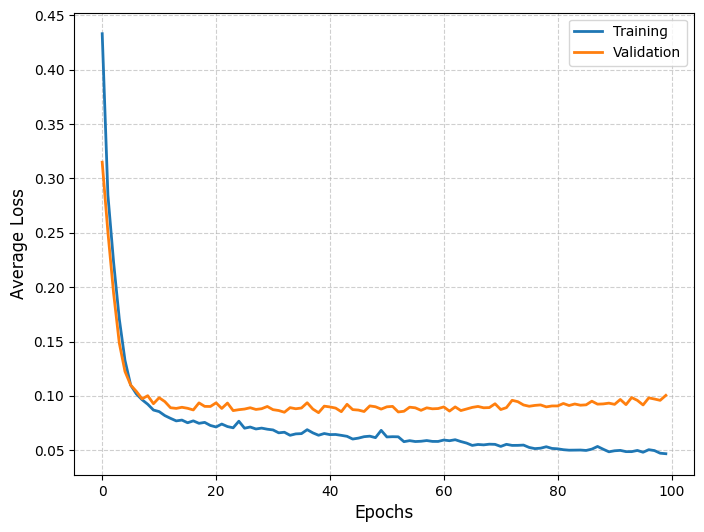

In [50]:
#Neural Network
ResultsNNGAX2, STDResultsNNGAX2, BestGAX2NN= evaluate_neural_network_with_kfold(X_train_GaX2Ft, y_train, k=10, plot=True)



### GA ReliefF


In [51]:
# Naive Bayes
ResultsNBGAReliefF, STDResultsNBGAReliefF, BestGARFNB= evaluate_naive_bayes_with_kfold(X_train_GaReliefFFt, y_train, k=10)

F1 Score: 0.744 $\pm$ 0.083
Accuracy: 0.943 $\pm$ 0.020
Precision: 0.669 $\pm$ 0.103
Recall: 0.856 $\pm$ 0.116
AUC: 0.904 $\pm$ 0.056


In [52]:
#Random Forest
ResultsRFGAReliefF, STDResultsRFGAReliefF, BestGARFRF= evaluate_random_forest_with_kfold(X_train_GaReliefFFt, y_train, k=10)


F1 Score: 0.777 $\pm$ 0.095
Accuracy: 0.959 $\pm$ 0.017
Precision: 0.821 $\pm$ 0.113
Recall: 0.746 $\pm$ 0.122
AUC: 0.864 $\pm$ 0.062


In [53]:
#Neural Network
ResultsNNGAReliefF, STDResultsNNGAReliefF, BestGARFNB= evaluate_neural_network_with_kfold(X_train_GaReliefFFt, y_train, k=10)

F1 Score: 0.808 $\pm$ 0.058
Accuracy: 0.964 $\pm$ 0.011
Precision: 0.824 $\pm$ 0.081
Recall: 0.806 $\pm$ 0.110
AUC: 0.980 $\pm$ 0.028


## CS

### CS Mutual Information

In [54]:
# Naive Bayes
ResultsNBCSMI, STDResultsNBCSMI, BestCSMINB= evaluate_naive_bayes_with_kfold(X_train_CsMiFt, y_train, k=10)


F1 Score: 0.776 $\pm$ 0.056
Accuracy: 0.949 $\pm$ 0.016
Precision: 0.681 $\pm$ 0.084
Recall: 0.914 $\pm$ 0.057
AUC: 0.933 $\pm$ 0.026


In [72]:
#Random Forest
ResultsRFCsMI, STDResultsRFCsMI, BestCSMIRF= evaluate_random_forest_with_kfold(X_train_CsMiFt, y_train, k=10)


F1 Score: 0.806 $\pm$ 0.066
Accuracy: 0.966 $\pm$ 0.010
Precision: 0.891 $\pm$ 0.087
Recall: 0.756 $\pm$ 0.123
AUC: 0.872 $\pm$ 0.058


In [56]:
#Neural Network
ResultsNNCsMI, STDResultsNNCsMI, BestCSMINN= evaluate_neural_network_with_kfold(X_train_CsMiFt, y_train, k=10)


F1 Score: 0.856 $\pm$ 0.091
Accuracy: 0.973 $\pm$ 0.017
Precision: 0.875 $\pm$ 0.077
Recall: 0.843 $\pm$ 0.119
AUC: 0.990 $\pm$ 0.013


### CS X2

In [57]:
# Naive Bayes
ResultsNBCSX2, STDResultsNBCSX2, BestCSX2NB= evaluate_naive_bayes_with_kfold(X_train_CsX2Ft, y_train, k=10)

F1 Score: 0.794 $\pm$ 0.078
Accuracy: 0.956 $\pm$ 0.017
Precision: 0.733 $\pm$ 0.106
Recall: 0.878 $\pm$ 0.094
AUC: 0.921 $\pm$ 0.046


In [80]:
#Random Forest
ResultsRFCsX2, STDResultsRFCsX2, BestCSX2RF= evaluate_random_forest_with_kfold(X_train_CsX2Ft, y_train, k=10)


F1 Score: 0.809 $\pm$ 0.065
Accuracy: 0.966 $\pm$ 0.010
Precision: 0.877 $\pm$ 0.080
Recall: 0.768 $\pm$ 0.115
AUC: 0.878 $\pm$ 0.055


In [ ]:
#Neural Network
ResultsNNCsX2, STDResultsNNCsX2, BestCSX2NN= evaluate_neural_network_with_kfold(X_train_CsX2Ft, y_train, k=10, plot=True)

### CS ReliefF


In [60]:
# Naive Bayes
ResultsNBCsReliefF, STDResultsNBCsReliefF, BestCSRFNB= evaluate_naive_bayes_with_kfold(X_train_CsReliefFFt, y_train, k=10)


F1 Score: 0.749 $\pm$ 0.082
Accuracy: 0.944 $\pm$ 0.018
Precision: 0.671 $\pm$ 0.116
Recall: 0.867 $\pm$ 0.110
AUC: 0.909 $\pm$ 0.054


In [292]:
#Random Forest
ResultsRFCsReliefF, STDResultsRFCsReliefF, BestCSRFRF= evaluate_random_forest_with_kfold(X_train_CsReliefFFt, y_train, k=10)


F1 Score: 0.762 $\pm$ 0.082
Accuracy: 0.958 $\pm$ 0.014
Precision: 0.841 $\pm$ 0.118
Recall: 0.721 $\pm$ 0.142
AUC: 0.852 $\pm$ 0.068


F1 Score: 0.809 $\pm$ 0.070
Accuracy: 0.964 $\pm$ 0.013
Precision: 0.822 $\pm$ 0.085
Recall: 0.806 $\pm$ 0.110
AUC: 0.980 $\pm$ 0.025


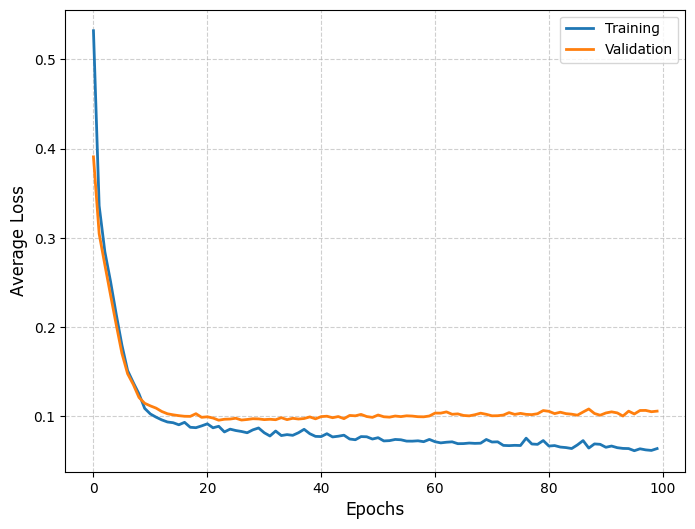

In [318]:
#Neural Network
ResultsNNCsReliefF, STDResultsNNCsReliefF, BestCSRFNN= evaluate_neural_network_with_kfold(X_train_CsReliefFFt, y_train, k=10, plot=True)


# ALL FEATURES

In [63]:
# Naive Bayes
# ResultsNBAll, STDResultsNBAll= evaluate_naive_bayes_with_kfold(X_train, y_train, k=10)

In [64]:
#Random Forest
# ResultsRFAll, STDResultsRFAll= evaluate_random_forest_with_kfold(X_train, y_train, k=10)


In [88]:
#Neural Network
# ResultsNNAll, STDResultsNNAll= evaluate_neural_network_with_kfold(X_train, y_train, k=10)   


### Save Results



# Results

In [89]:
results = [
    # GAMI
    ResultsNBGAMI, ResultsRFGAMI, ResultsNNGAMI,
    # GAX2
    ResultsNBGAX2, ResultsRFGAX2, ResultsNNGAX2,
    # GAReliefF
    ResultsNBGAReliefF, ResultsRFGAReliefF, ResultsNNGAReliefF,
    # CsMI
    ResultsNBCSMI, ResultsRFCsMI, ResultsNNCsMI,
    # CsX2
    ResultsNBCSX2, ResultsRFCsX2, ResultsNNCsX2,
    # CsReliefF
    ResultsNBCsReliefF, ResultsRFCsReliefF, ResultsNNCsReliefF,
    # # All features
    # ResultsNBAll, ResultsRFAll, ResultsNNAll
]

best_f1_avg = max(np.mean(results[i][3]) for i in range(len(results)))
print("Best F1 Score Average (excluding all features): ", best_f1_avg)

# Find the index of the list containing the best F1 average
best_f1_avg_index = next(i for i in range(len(results)) if np.mean(results[i][3]) == best_f1_avg)
print("Best F1 Score Average belongs to list index (excluding all features): ", best_f1_avg_index)
result_names = [
    "ResultsNBGAMI", "ResultsRFGAMI", "ResultsNNGAMI",
    "ResultsNBGAX2", "ResultsRFGAX2", "ResultsNNGAX2",
    "ResultsNBGAReliefF", "ResultsRFGAReliefF", "ResultsNNGAReliefF",
    "ResultsNBCSMI", "ResultsRFCsMI", "ResultsNNCsMI",
    "ResultsNBCSX2", "ResultsRFCsX2", "ResultsNNCsX2",
    "ResultsNBCsReliefF", "ResultsRFCsReliefF", "ResultsNNCsReliefF"
]

print("Result Names:")
for i, name in enumerate(result_names):
    print(f"{i}: {name}")


average_f1_scores = [np.mean(result[3]) for result in results]


Best F1 Score Average (excluding all features):  0.8557096171802054
Best F1 Score Average belongs to list index (excluding all features):  11
Result Names:
0: ResultsNBGAMI
1: ResultsRFGAMI
2: ResultsNNGAMI
3: ResultsNBGAX2
4: ResultsRFGAX2
5: ResultsNNGAX2
6: ResultsNBGAReliefF
7: ResultsRFGAReliefF
8: ResultsNNGAReliefF
9: ResultsNBCSMI
10: ResultsRFCsMI
11: ResultsNNCsMI
12: ResultsNBCSX2
13: ResultsRFCsX2
14: ResultsNNCsX2
15: ResultsNBCsReliefF
16: ResultsRFCsReliefF
17: ResultsNNCsReliefF


In [90]:
# Create a DataFrame to store F1 scores for each fold
f1_scores_table = pd.DataFrame()

# Iterate through the results and extract F1 scores
for i, result in enumerate(results):
    f1_scores_table[f"Model {i}"] = result[3]  # F1 scores are at index 3

# Display the table
f1_scores_table.index.name = "Fold"
f1_scores_table

,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
Fold,,,,,,,,,,,,,,,,,,
0,0.777778,0.714286,0.666667,0.777778,0.800000,0.800000,0.777778,0.666667,0.750000,0.777778,0.800000,0.875000,0.705882,0.800000,0.800000,0.666667,0.800000,0.750000
1,0.875000,0.769231,0.933333,0.888889,0.769231,0.933333,0.875000,0.857143,0.857143,0.888889,0.769231,1.000000,1.000000,0.857143,0.875000,0.933333,0.857143,0.857143
2,0.888889,0.800000,0.800000,0.888889,0.875000,0.800000,0.727273,0.800000,0.800000,0.823529,0.875000,0.875000,0.823529,0.800000,0.800000,0.842105,0.800000,0.750000
3,0.631579,0.800000,0.800000,0.736842,0.800000,0.777778,0.636364,0.666667,0.750000,0.736842,0.800000,0.933333,0.823529,0.800000,0.777778,0.700000,0.666667,0.750000
4,0.736842,0.823529,0.777778,0.736842,0.777778,0.800000,0.700000,0.777778,0.888889,0.736842,0.777778,0.941176,0.736842,0.777778,0.750000,0.736842,0.777778,0.750000
5,0.800000,0.941176,0.888889,0.761905,0.875000,0.941176,0.842105,0.941176,0.842105,0.727273,0.875000,0.823529,0.800000,0.875000,0.875000,0.761905,0.888889,0.842105
6,0.782609,0.823529,0.761905,0.818182,0.777778,0.777778,0.761905,0.823529,0.888889,0.750000,0.888889,0.888889,0.782609,0.888889,0.777778,0.782609,0.750000,0.900000
7,0.842105,0.705882,0.823529,0.842105,0.750000,0.705882,0.666667,0.625000,0.705882,0.842105,0.750000,0.705882,0.777778,0.750000,0.705882,0.666667,0.666667,0.750000
8,0.750000,0.857143,0.933333,0.750000,0.857143,0.800000,0.625000,0.857143,0.800000,0.777778,0.666667,0.714286,0.750000,0.666667,0.933333,0.666667,0.769231,0.800000


# P-Test

In [91]:
from scipy.stats import wilcoxon
import pandas as pd
import numpy as np

# Assuming 'results' is a list of model results where each contains F1 scores at index 3
pivot_index = best_f1_avg_index  # ResultsNNCsMI
pivot_model = results[pivot_index][3]  # Extract F1 scores from index 3

print(f"Comparing pivot model (results[{pivot_index}]) to others:\n")

# Create a DataFrame to store the results
comparison_results = []

for i, model_scores in enumerate(results):
    if i == pivot_index:
        continue

    model_f1_scores = model_scores[3]  # F1 scores are at index 3 in each result
    
    # Make sure both arrays have the same length
    min_length = min(len(pivot_model), len(model_f1_scores))
    if len(pivot_model) != len(model_f1_scores):
        print(f"Warning: Length mismatch for model {i}. Truncating to {min_length} samples.")
        x = pivot_model[:min_length]
        y = model_f1_scores[:min_length]
    else:
        x = pivot_model
        y = model_f1_scores
    
    # Check if there are enough non-zero differences for the test
    differences = np.array(x) - np.array(y)
    non_zero_diffs = differences[differences != 0]
    
    if len(non_zero_diffs) < 6:  # Wilcoxon test requires at least 6 non-zero differences for reliability
        print(f"Model Index {i}: Insufficient non-zero differences ({len(non_zero_diffs)}), skipping test")
        p_value_formatted = "N/A"
        significance = "Insufficient data"
    else:
        try:
            # In newer scipy versions, wilcoxon returns a tuple (statistic, pvalue)
            result = wilcoxon(x, y)
            if isinstance(result, tuple):
                stat, p = result
            else:
                # For older scipy versions that might return just the statistic
                p = result
                stat = None
                
            significance = "Significant" if p < 0.05 else "Not Significant"
            p_value_formatted = f"p < 0.05" if p < 0.050 else f"p = {p:.3f}"
            print(f"Model Index {i}: {p_value_formatted}")
        except Exception as e:
            print(f"Model Index {i}: Error in Wilcoxon test - {str(e)}")
            p_value_formatted = f"Error: {str(e)}"
            significance = "Error"
    
    comparison_results.append({
        "Model Index": i,
        # "Model Name": f"Model {i}" if i < len(results) and len(results[i]) > 0 and isinstance(results[i][0], str) else f"Model {i}",
        "Model Name": result_names[i] if i < len(result_names) else f"Model {i}",
        "F1 Score": np.mean(model_f1_scores),""
        "p-value": p_value_formatted,
        "Significance": significance
    })

# Create the DataFrame from the list of dictionaries
comparison_df = pd.DataFrame(comparison_results)

# # Sort by significance and p-value for better readability
# comparison_df = comparison_df.sort_values(by=["Significance", "p-value"], 
#                                          key=lambda x: pd.Categorical(x["Significance"], 
#                                                                     categories=["Significant", "Not Significant", "Insufficient data", "Error"], 
#                                                                     ordered=True))

print("\nSummary of comparison results:")
print(comparison_df)

# Optional: Save to CSV
# comparison_df.to_csv("model_comparison_results.csv", index=False)

# The DataFrame can be displayed in a notebook or returned from a function
comparison_df

Comparing pivot model (results[11]) to others:

Model Index 0: p = 0.131
Model Index 1: p = 0.313
Model Index 2: p = 0.375
Model Index 3: p = 0.105
Model Index 4: p = 0.286
Model Index 5: p = 0.260
Model Index 6: p < 0.05
Model Index 7: p = 0.105
Model Index 8: p = 0.128
Model Index 9: p = 0.064
Model Index 10: p = 0.161
Model Index 12: p = 0.066
Model Index 13: p = 0.108
Model Index 14: p = 0.259
Model Index 15: p < 0.05
Model Index 16: p < 0.05
Model Index 17: p = 0.105

Summary of comparison results:
    Model Index          Model Name  F1 Score    p-value     Significance
0             0       ResultsNBGAMI  0.782164  p = 0.131  Not Significant
1             1       ResultsRFGAMI  0.810978  p = 0.313  Not Significant
2             2       ResultsNNGAMI  0.820896  p = 0.375  Not Significant
3             3       ResultsNBGAX2  0.790143  p = 0.105  Not Significant
4             4       ResultsRFGAX2  0.815693  p = 0.286  Not Significant
5             5       ResultsNNGAX2  0.817805  

c:\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
c:\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


,Model Index,Model Name,F1 Score,p-value,Significance
0,0,ResultsNBGAMI,0.782164,p = 0.131,Not Significant
1,1,ResultsRFGAMI,0.810978,p = 0.313,Not Significant
2,2,ResultsNNGAMI,0.820896,p = 0.375,Not Significant
3,3,ResultsNBGAX2,0.790143,p = 0.105,Not Significant
4,4,ResultsRFGAX2,0.815693,p = 0.286,Not Significant
5,5,ResultsNNGAX2,0.817805,p = 0.260,Not Significant
6,6,ResultsNBGAReliefF,0.743562,p < 0.05,Significant
7,7,ResultsRFGAReliefF,0.776510,p = 0.105,Not Significant
8,8,ResultsNNGAReliefF,0.808291,p = 0.128,Not Significant
9,9,ResultsNBCSMI,0.776104,p = 0.064,Not Significant


In [92]:
# from scipy.stats import wilcoxon
# import pandas as pd

# pivot_index = 11  # ResultsNNCsMI
# pivot_model = results[pivot_index][3]  # Extract F1 scores from index 3

# print(f"Comparing pivot model (results[{pivot_index}]) to others:\n")

# # Create a DataFrame to store the results
# comparison_results = pd.DataFrame(columns=["Model Index", "p-value", "Significance"])
# for i, model_scores in enumerate(results):
#     if i == pivot_index:
#         continue

#     model_f1_scores = model_scores[3]  # F1 scores are at index 3 in each result
#     stat, p = wilcoxon(pivot_model, model_f1_scores)
#     significance = "Significant" if p < 0.05 else "Not Significant"
#     p_value_formatted = f"p $<$ 0.05" if p < 0.050 else f"p $=$ {p:.3f}"
#     print(f"Model Index {i}: {p_value_formatted}")
#     comparison_results = pd.concat(
#         [comparison_results, pd.DataFrame({"Model Index": [i], "Model Name": result_names[i], "Avg F1": np.mean(model_scores[3]), "p-value": [p_value_formatted], "Significance": [significance]})],
#         ignore_index=True
#     )

# # Display the results as a table
# comparison_results


# Results

In [93]:
for i, result in enumerate(results):
    print(f"Model {i}: {result_names[i]}")
    print("F1 Scores: ", np.mean(result[3]),"\\np", np.std(result[3]))
    print("Accuracy: ", np.mean(result[0]),"\\np", np.std(result[0]))
    print("Precision: ", np.mean(result[1]),"\\np", np.std(result[1]))
    print("Recall: ", np.mean(result[2]),"\\np", np.std(result[2]))
    print("AUC: ", np.mean(result[4]),"\\np", np.std(result[4]))
    if i == pivot_index:
        print("Pivot Model (ResultsNNCsMI)", "\n")
    else:
        print("P-Value: ", comparison_df.loc[comparison_df["Model Index"] == i, "p-value"].values[0], "\n")


Model 0: ResultsNBGAMI
F1 Scores:  0.782164378337147 \np 0.07194287225612712
Accuracy:  0.9522024623803009 \np 0.01685084899052982
Precision:  0.7052705627705628 \np 0.09444951031570036
Recall:  0.888888888888889 \np 0.08740073734751262
AUC:  0.9238233988233988 \np 0.04390428582880334
P-Value:  p = 0.131 

Model 1: ResultsRFGAMI
F1 Scores:  0.8109776987718164 \np 0.06773114905895827
Accuracy:  0.9662243502051984 \np 0.012093123842826204
Precision:  0.8714285714285713 \np 0.07665923096479564
Recall:  0.7694444444444445 \np 0.11354963019983165
AUC:  0.8782786657786659 \np 0.055981766805440904
P-Value:  p = 0.313 

Model 2: ResultsNNGAMI
F1 Scores:  0.8208963585434175 \np 0.07740822350338297
Accuracy:  0.9650615595075239 \np 0.01558057261201195
Precision:  0.8248015873015874 \np 0.11028280402306481
Recall:  0.8291666666666666 \np 0.09900157437331521
AUC:  0.9884226884226885 \np 0.011773627387568729
P-Value:  p = 0.375 

Model 3: ResultsNBGAX2
F1 Scores:  0.7901431609326346 \np 0.062735350

# Validation


run with holdout

# Validation with GA-X2-NN

In [290]:
print(X_train_CsReliefFFt.columns)
print(X_test_CsReliefFFt.columns)

Index(['f4_t_entropy', 'f6_t_multiscaleEntropy', 'f7_t_time2peak',
       'f10_t_peak2rms', 'f13_t_PeaksAboveRMSDensity_fun',
       'f15_f_90_percent_energy', 'f19_f_var', 'f22_f_multiscaleEntropy',
       'f23_f_peak_1020_value', 'f29_f_power', 'f33_f_peaks_val_3',
       'f39_w_f_maxval_D4', 'f42_w_f_maxpos_A6', 'f50_w_f_mean_D2',
       'f55_w_t_meanEnergyAD', 'f57_w_t_PEC_D1', 'f58_w_t_PEC_D2',
       'f59_w_t_PEC_D3', 'f62_w_t_PEC_D6', 'f63_w_t_rms_A6', 'f64_w_t_rms_D1',
       'f65_w_t_rms_D2', 'f67_w_t_rms_D4'],
      dtype='object')
Index(['f4_t_entropy', 'f6_t_multiscaleEntropy', 'f7_t_time2peak',
       'f10_t_peak2rms', 'f13_t_PeaksAboveRMSDensity_fun',
       'f15_f_90_percent_energy', 'f19_f_var', 'f22_f_multiscaleEntropy',
       'f23_f_peak_1020_value', 'f29_f_power', 'f33_f_peaks_val_3',
       'f39_w_f_maxval_D4', 'f42_w_f_maxpos_A6', 'f50_w_f_mean_D2',
       'f55_w_t_meanEnergyAD', 'f57_w_t_PEC_D1', 'f58_w_t_PEC_D2',
       'f59_w_t_PEC_D3', 'f62_w_t_PEC_D6', 'f63_w

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation Results with CS Relieff Rf Data:
Accuracy: 0.962
Precision: 0.722
Recall: 0.684
F1 Score: 0.703
AUC: 0.972


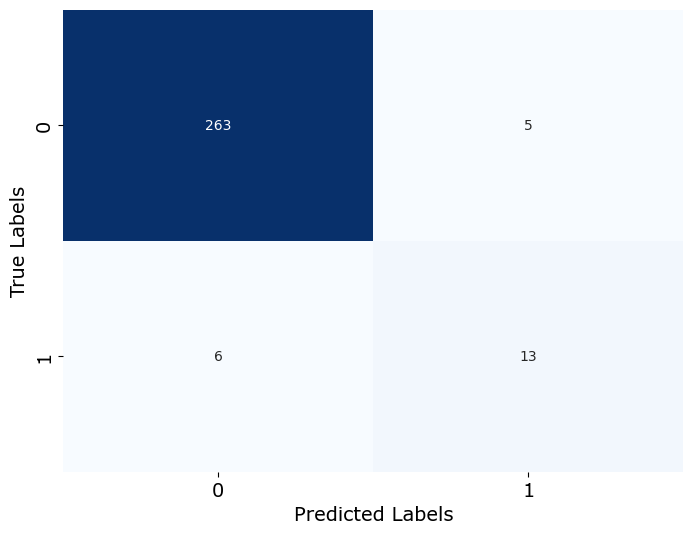

In [323]:
# Use the best model from GA--NN
best_model = BestCSRFNN

# Predict on the holdout data
y_pred_prob = best_model.predict(X_test_CsReliefFFt)
y_pred_holdout = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model on the holdout data
accuracy = accuracy_score(y_test, y_pred_holdout)
precision = precision_score(y_test, y_pred_holdout)
recall = recall_score(y_test, y_pred_holdout)
f1 = f1_score(y_test, y_pred_holdout)
auc = roc_auc_score(y_test, y_pred_prob)  # Use probabilities for AUC calculation

# Print the results
print("Validation Results with CS Relieff Rf Data:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# Plot the confusion matrix
confusion_matrix_heatmap(y_test, y_pred_holdout)

In [ ]:
# Use the best model from GA--NN
best_model = BestCSMINN

# Predict on the holdout data
y_pred_prob = best_model.predict(X_test_CsMiFt)
y_pred_holdout = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model on the holdout data
accuracy = accuracy_score(y_test, y_pred_holdout)
precision = precision_score(y_test, y_pred_holdout)
recall = recall_score(y_test, y_pred_holdout)
f1 = f1_score(y_test, y_pred_holdout)
auc = roc_auc_score(y_test, y_pred_prob)  # Use probabilities for AUC calculation

# Print the results
print("Validation Results with CS Relieff Rf Data:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# Plot the confusion matrix
confusion_matrix_heatmap(y_test, y_pred_holdout)

In [ ]:
# Define the metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

# Create an empty DataFrame with 3 rows and the metrics as columns
manual_metrics_table = pd.DataFrame(index=["CSX2NN", "CSX2RF", "CSRFRF"], columns=metrics)

In [241]:

manual_metrics_table["L"] = [24, 24, 23]

# Reorder columns to move "F1" to the first and "L" to the second position
manual_metrics_table = manual_metrics_table[["F1 Score", "L"] + [col for col in manual_metrics_table.columns if col not in ["F1 Score", "L"]]]
# Display the table
manual_metrics_table

,F1 Score,L,Accuracy,Precision,Recall,AUC
CSX2NN,0.628571,24,0.954704,0.6875,0.578947,0.96524
CSX2RF,0.722222,24,0.965157,0.764706,0.684211,0.834643
CSRFRF,0.736842,23,0.965157,0.736842,0.736842,0.977219


# Feature Analysis

## Features by domain

In [303]:
features = {
    "time_domain": {
        "f1": "Mean",
        "f2": "Standard deviation",
        "f3": "Variance",
        "f4": "Entropy",
        "f5": "Kurtosis",
        "f6": "Multiscale entropy (MSE)",
        "f7": "Time to reach the maximum peak",
        "f8": "RMS value",
        "f9": "Peak-to-peak value",
        "f10": "Peak-to-RMS ratio",
        "f11": "Energy",
        "f12": "Zero-crossing rate",
        "f13": "Density of peaks above RMS"
    },
    "frequency_domain": {
        "f14": "Frequency of maximum peak",
        "f15": "Bandwidth of 90% energy",
        "f16": "Entropy",
        "f17": "Mean",
        "f18": "Standard deviation",
        "f19": "Variance",
        "f20": "Energy",
        "f21": "Kurtosis",
        "f22": "Multiscale entropy",
        "f23": "Maximum peak in 10–20 Hz band",
        "f24": "Freq. of max. peak in 10–20 Hz Band",
        "f25": "Maximum peak in 20–30 Hz band",
        "f26": "Freq. of max. Peak in 20–30 Hz Band",
        "f27": "RMS value",
        "f28": "Peak-to-RMS ratio",
        "f29": "Power",
        "f30": "Density of peaks above RMS",
        "f31": "2nd highest peak value",
        "f32": "Freq. of 2nd highest peak",
        "f33": "3rd highest peak value",
        "f34": "Freq. of 3rd highest peak"
    },
    "scale_domain": {
        "f35": "A6 Max. peak in freq.-domain",
        "f36": "D1 Max. peak in freq.-domain",
        "f37": "D2 Max. peak in freq.-domain",
        "f38": "D3 Max. peak in freq.-domain",
        "f39": "D4 Max. peak in freq.-domain",
        "f40": "D5 Max. peak in freq.-domain",
        "f41": "D6 Max. peak in freq.-domain",
        "f42": "A6 Freq. of max. peak",
        "f43": "D2 Freq. of max. peak",
        "f44": "D3 Freq. of max. peak",
        "f45": "D4 Freq. of max. peak",
        "f46": "D5 Freq. of max. peak",
        "f47": "D6 Freq. of max. peak",
        "f48": "A6 Mean in freq.-domain",
        "f49": "D1 Mean in freq.-domain",
        "f50": "D2 Mean in freq.-domain",
        "f51": "D3 Mean in freq.-domain",
        "f52": "D4 Mean in freq.-domain",
        "f53": "D5 Mean in freq.-domain",
        "f54": "D6 Mean in freq.-domain",
        "f55": "Mean energy of components",
        "f56": "Percentage of energy for A6",
        "f57": "Percentage of energy for D1",
        "f58": "Percentage of energy for D2",
        "f59": "Percentage of energy for D3",
        "f60": "Percentage of energy for D4",
        "f61": "Percentage of energy for D5",
        "f62": "Percentage of energy for D6",
        "f63": "A6 RMS in time-domain",
        "f64": "D1 RMS in time-domain",
        "f65": "D2 RMS in time-domain",
        "f66": "D3 RMS in time-domain",
        "f67": "D4 RMS in time-domain",
        "f68": "D5 RMS in time-domain",
        "f69": "D6 RMS in time-domain",
        "f70": "A6 Peak-to-peak in time-domain",
        "f71": "D1 Peak-to-peak in time-domain",
        "f72": "D2 Peak-to-peak in time-domain",
        "f73": "D3 Peak-to-peak in time-domain",
        "f74": "D4 Peak-to-peak in time-domain",
        "f75": "D5 Peak-to-peak in time-domain",
        "f76": "D6 Peak-to-peak in time-domain",
        "f77": "A6 Peak-to-RMS ratio in time-domain",
        "f78": "D1 Peak-to-RMS ratio in time-domain",
        "f79": "D2 Peak-to-RMS ratio in time-domain",
        "f80": "D3 Peak-to-RMS ratio in time-domain",
        "f81": "D4 Peak-to-RMS ratio in time-domain",
        "f82": "D5 Peak-to-RMS ratio in time-domain",
        "f83": "D6 Peak-to-RMS ratio in time-domain"
    }
}






In [306]:
print(CsReliefFFtIndices)

[4, 6, 7, 10, 13, 15, 19, 22, 23, 29, 33, 39, 42, 50, 55, 57, 58, 59, 62, 63, 64, 65, 67]


In [304]:
selected_features_by_domain = {
    "time_domain": {
        "f4": "Entropy",
        "f6": "Multiscale entropy (MSE)",
        "f7": "Time to reach the maximum peak",
        "f10": "Peak-to-RMS ratio",
        "f13": "Density of peaks above RMS"
    },
    "frequency_domain": {
        "f15": "Bandwidth of 90% energy",
        "f19": "Variance",
        "f22": "Multiscale entropy",
        "f23": "Maximum peak in 10–20 Hz band",
        "f29": "Power",
        "f33": "3rd highest peak value"
    },
    "scale_domain": {
        "f39": "D4 Max. peak in freq.-domain",
        "f42": "A6 Freq. of max. peak",
        "f50": "D2 Mean in freq.-domain",
        "f55": "Mean energy of components",
        "f57": "Percentage of energy for D1",
        "f58": "Percentage of energy for D2",
        "f59": "Percentage of energy for D3",
        "f62": "Percentage of energy for D6",
        "f63": "A6 RMS in time-domain",
        "f64": "D1 RMS in time-domain",
        "f65": "D2 RMS in time-domain",
        "f67": "D4 RMS in time-domain"
    }
}


In [316]:
print("Percentage of features in the time domain 5 features of 23:", 5/23*100, "%")
print("Percentage of features in the frequency domain 6 features of 23:", 6/23*100, "%")
print("Percentage of features in the scale domain 12 features of 23:", 12/23*100, "%")

Percentage of features in the time domain 5 features of 23: 21.73913043478261 %
Percentage of features in the frequency domain 6 features of 23: 26.08695652173913 %
Percentage of features in the scale domain 12 features of 23: 52.17391304347826 %
